In [1]:
from sklearn import datasets

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

In [3]:
import pandas as pd
import numpy as np

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [4]:
df=pd.DataFrame(features,columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
print(target)
print(iris.target_names)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

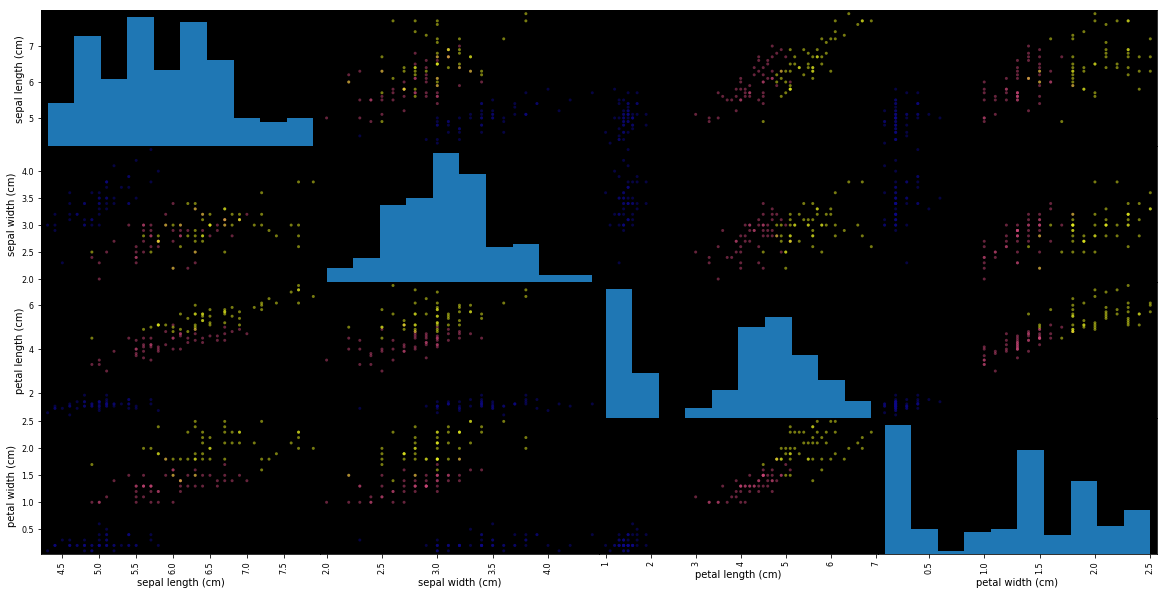

In [19]:
scatter_matrix(df,figsize=(20,10),c=target,cmap="plasma",facecolor="black")
plt.show()

### Elbow Method to determine optimal number of clusters

In [20]:
from sklearn.cluster import KMeans

In [22]:
X=[]
Y=[]

for i in range (1,31):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    
    X.append(i)# no of clusters
    
    awcss=kmeans.inertia_/df.shape[0]
    Y.append(awcss)

In [23]:
len(X)

30

In [24]:
len(Y)

30

<function matplotlib.pyplot.show(*args, **kw)>

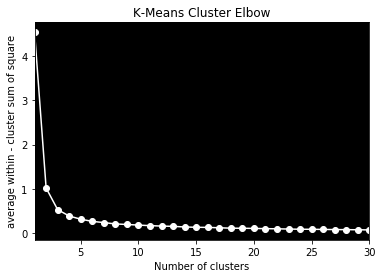

In [28]:
plt.plot(X,Y,'bo-',color="white")
plt.xlim((1,30))
plt.xlabel("Number of clusters")
plt.ylabel("average within - cluster sum of square")
plt.title("K-Means Cluster Elbow")

plt.show

# Principle Component Analysis (PCA)

In [30]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [31]:
pca=PCA(n_components=2)

In [32]:
pc=pca.fit_transform(df)

In [33]:
print(pc.shape)
print(pc[:10])

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [34]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Visualize the Cluster

In [37]:
h=0.02

x_min,x_max=pc[:,0].min()-1,pc[:,0].max()+1
y_min,y_max=pc[:,1].min()-1,pc[:1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

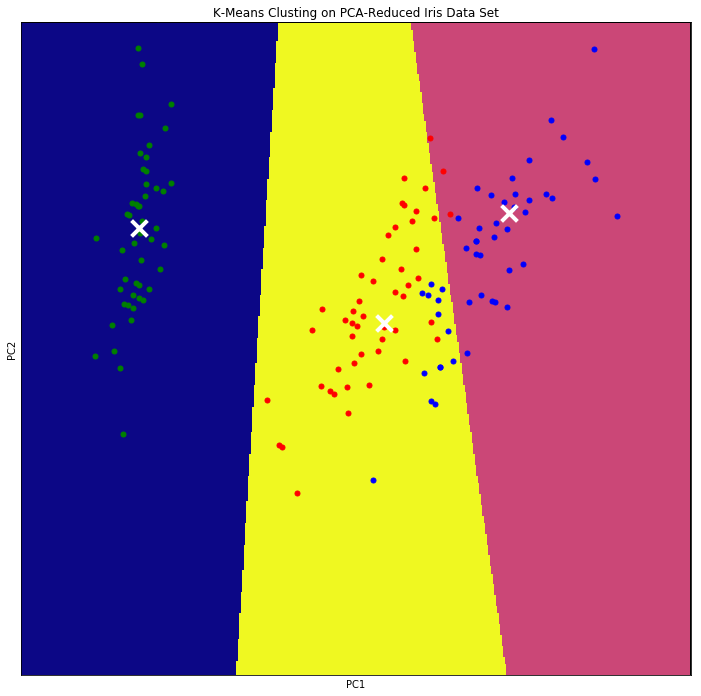

In [39]:
Z=kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure(figsize=(12,12))
plt.clf()
plt.imshow(Z,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),
                                            cmap='plasma',
                                            aspect='auto',origin='lower')

for i,point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0],point[1],'g.',markersize=10)
    if target[i] == 1:
        plt.plot(point[0],point[1],'r.',markersize=10)
    if target[i] == 2:
        plt.plot(point[0],point[1],'b.',markersize=10)
        
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=250,linewidth=4,color='w',
           zorder=10)

plt.title("K-Means Clusting on PCA-Reduced Iris Data Set")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xticks(())
plt.yticks(())

plt.show()


### Clustering Metrics

It looks good! But did the PCA reduction impact the performance of our K means clustering algorithm? Let's investigate by using some common clustering metrics, such as homogeneity, completeness, and V-measure.

* Homogeneity - measures whether or not all of its clusters contain only data points which are members of a single class.
* Completeness - measures whether or not all members of a given class are elements of the same cluster
* V-measure - the harmonic mean between homogeneity and completeness



In [40]:
from sklearn import metrics

In [41]:
kmeans1=KMeans(n_clusters=3)
kmeans1.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
kmeans2=KMeans(n_clusters=3)
kmeans2.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
print('NON-PCA Data')
print(f"Homogeneity: {metrics.homogeneity_score(target,kmeans1.labels_)}")
print(f"Completeness: {metrics.completeness_score(target,kmeans1.labels_)}")
print(f"V-measure: {metrics.v_measure_score(target,kmeans1.labels_)}")

NON-PCA Data
Homogeneity: 0.7514854021988338
Completeness: 0.7649861514489815
V-measure: 0.7581756800057784


In [44]:
print('PCA reduced Data')
print(f"Homogeneity: {metrics.homogeneity_score(target,kmeans2.labels_)}")
print(f"Completeness: {metrics.completeness_score(target,kmeans2.labels_)}")
print(f"V-measure: {metrics.v_measure_score(target,kmeans2.labels_)}")

PCA reduced Data
Homogeneity: 0.736419288125285
Completeness: 0.7474865805095325
V-measure: 0.7419116631817838


In [45]:
print(kmeans1.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [46]:
print(kmeans2.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
